# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

# Angel Racini Meza
## C.C 1017248189


In [20]:
#Importando las librerias necesarias para trabajar el problema. 
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Importando el dataset
df = pd.read_csv(r"C:\Users\ANGEL\Desktop\Trabajo Redes Neuronales\evaluacion-arracinim\datos\diabetes.csv", sep=",", encoding= 'utf-8')
#Mostrando el data set
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
#Cambiando el nombre a las columnas del dataset
df.columns = ['edad', 'sexo', 'imc', 'presion', 's1', 's2', 's3', 's4', 's5', 's6', 'Y']

## Exploratory Data Exploration  EDA

In [4]:
#Medidas de dispersion estandar
df.describe()

,edad,sexo,imc,presion,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634599e-16,1.296411e-16,-8.042209e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.575274e-16,3.780755e-16,-3.830854e-16,-3.411950e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Podemos notar que todos los features y el target son datos numericos.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

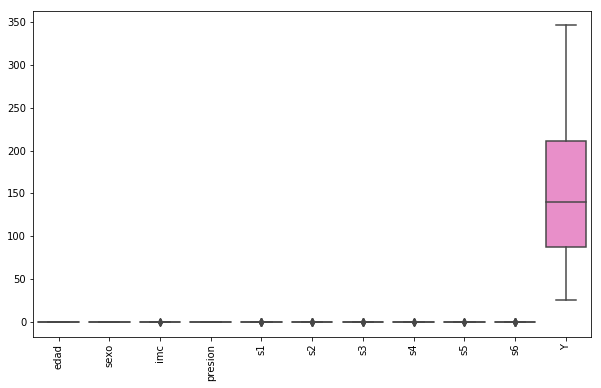

In [5]:
#Graficando un boxplot para cada variable 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)

Vemos que los datos deben ser normalizados para llevarlos a la misma escala.

## Data Transformation

Dividimos los datos en X y en Y y normalizamos. 

In [6]:
x = df.iloc[:,0:9]
y = df.iloc[:,10]

In [7]:
# Normalizamos las features. 
X = pd.DataFrame(normalize(x), columns = x.columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

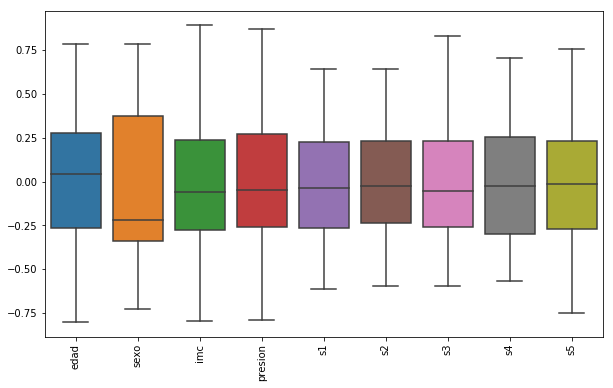

In [8]:
#Graficando las feautures despues de normalizar. 
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)

## Feauture Selection

Se hace una prueba de peso en las variables teniendo en cuenta el **valor-p** de selección. A menor valor p, mayor importancia tiene la variable prediciendo la variable respuesta.

In [9]:
Bests = SelectKBest(score_func = f_regression , k=len(X.columns)).fit(X, y)
Best = dict(zip(X.columns, Bests.pvalues_))
print(Best)

{'edad': 0.0002910639727882527, 'sexo': 0.9902938169395712, 'imc': 3.25754548987304e-38, 'presion': 9.13643299509795e-19, 's1': 3.1478851047680576e-05, 's2': 0.001882620977836911, 's3': 7.125712246036203e-16, 's4': 1.1897119819991254e-20, 's5': 2.6309835575172265e-38}


Podemos notar que las variables mas significativas para el modelo segun el valor-p de la prueba son el **imc**, **s4**, **s5**

Graficando el score para tener una mejor aproximación visual de la importancia de las features.

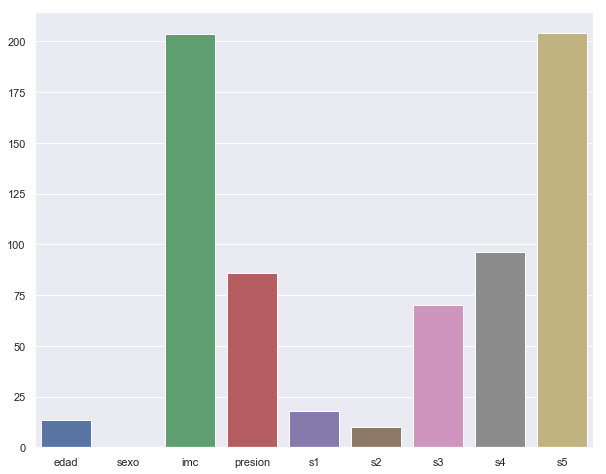

In [10]:
D = dict(zip(X.columns, Bests.scores_))
x_axis = [key for key in D.keys()]
y_axis = [value for value in D.values()]
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x_axis,y_axis)

Desde una aproximación visual de los datos, parece ser que las dos variables que mas importancia tienen en el modelo superando con creces a las demás son el **IMC** y el **s5**, Pero aun así, el score de las variables presion, s3, y s4 son bastante alto, lo suficiente como para no descartarlas y tenerlas en cuenta en el modelo. 

## Model Fitting

Se va a ajustar dos modelos, teniendo en cuenta las 5 variables
* IMC, PRESION, S3, S4 y S5

In [11]:
X = X.loc[:,['imc','presion', 's3','s4','s5']]

Diviendo la muenstra en entrenamiento y validacion.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
lm = LinearRegression()
#se entrena el modelo
lm.fit(X_train, y_train)
#Se valida el modelo con los datos de validacion
y_pred = lm.predict(X_test)

#Se obtienen las metricas del modelo 
print("Ajuste: %.2f" % lm.score(X_test, y_test))

Ajuste: 0.42


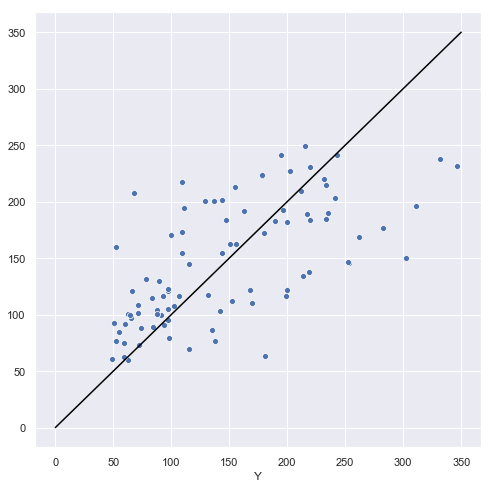

In [14]:
#Graficando para obtener una mejor visualización entre lo predicho y lo dicho.
plt.figure(figsize=(8, 8))
sns.scatterplot(y_test , y_pred)
plt.plot([0, 350], [0, 350], color='black')

Podemos concluir que con 5 variables es el mejor modelo para este caso pero aún así no logra un ajuste muy bueno para predicción. 0.47

## Cross Validation

In [15]:
#Obteniendo el score de validacion mediante la tenica de validación cruzada por la tecnica de K-Folds
#K-folds = 7
scores = cross_val_score(lm, X, y, cv=7)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.47 (+/- 0.18)


Por el metodo de validacion cruzada obtenemos un resultado interesante y es que el modelo puede tener un ajuste mayor o menor dependiendo de split de los datos que se tomen. El cual puede estar entre 0.29 y 0.65

## Neural Network Model

Para el modelo de redes neuronales se tendrá en cuenta la cantidad de neuronas en la capa oculta y su efecto en el modelo de 

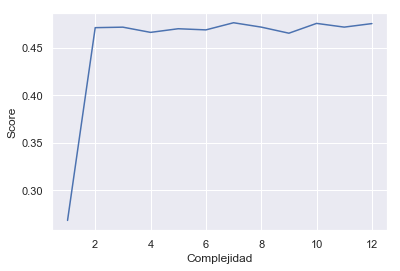

In [25]:
hidden_layers = [0,1,2,3,4,5,6,7,8,9,10,11,12]
depth = []

for i in hidden_layers:
    m = MLPRegressor(
        hidden_layer_sizes=(i,),
        learning_rate = "adaptive",
        solver = "sgd" 
    )
    
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=m, X=X, y=y, cv=5)
    depth.append((i,scores.mean()))

df_cross = pd.DataFrame(depth, columns =["Complejidad", "Score"])
sns.lineplot(x = 'Complejidad', y= 'Score', data =df_cross)

Podemos notar que con el modelo con 2 neuronas en la capa oculta parece ser el mejor modelo, puesto que de ahí en adelante el modelo no logra cambios significativos con respecto al score. 

In [26]:
m = MLPRegressor(
    hidden_layer_sizes=(2,),
    learning_rate = "adaptive",
    solver = "sgd" 
)

## Cross Validation for the Neural Network Model


In [27]:
scores = cross_val_score(m, X, y.values.ravel(), cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.47 (+/- 0.16)


Podemos notar que la precisión del modelo no es la mejor.

## Conclusiones

- El maximo ajuste logrado para el modelo fue en promedio 0.47 con con una desviación estandar bastante alta, incluso despues de probar con varias transformaciones de los datos.

- El modelo de redes neuronales aunque logra en promedio un ajuste muy similar al modelo de regresión linea, logra una desviacion estandar un poco menor. 